In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv("coca_cola_consumption_total_and_per_capita.csv")
df.head()

,Country,Region,Population_Millions,Coke_Liters_Per_Person_Per_Year,Total_Coke_Billion_Liters_Per_Year
0,Mexico,North America,129,246.0,31.734
1,United States,North America,333,133.0,44.289
2,Canada,North America,39,110.0,4.290
3,Brazil,South America,216,95.0,20.520
4,Argentina,South America,46,155.0,7.130


In [9]:
df["Per_Capita_Std"] = (
    (df["Coke_Liters_Per_Person_Per_Year"] -
     df["Coke_Liters_Per_Person_Per_Year"].mean()) /
    df["Coke_Liters_Per_Person_Per_Year"].std()
)

In [11]:
df["Total_Consumption_Std"] = (
    (df["Total_Coke_Billion_Liters_Per_Year"] -
     df["Total_Coke_Billion_Liters_Per_Year"].mean()) /
    df["Total_Coke_Billion_Liters_Per_Year"].std()
)

In [13]:
grouped_df = df.groupby('Region').mean(numeric_only=True)
display(grouped_df)

,Population_Millions,Coke_Liters_Per_Person_Per_Year,Total_Coke_Billion_Liters_Per_Year,Per_Capita_Std,Total_Consumption_Std
Region,,,,,
Africa,133.0,35.0,3.838333,-0.805215,-0.508634
Asia,656.6,29.7,6.826400,-0.898041,-0.234324
Europe,64.4,87.4,5.665600,0.112529,-0.340887
Middle East,36.0,70.0,2.520000,-0.192218,-0.629659
North America,167.0,163.0,26.771000,1.436602,1.596625
Oceania,26.0,120.0,3.120000,0.683492,-0.574578
South America,131.0,125.0,13.825000,0.771063,0.408160


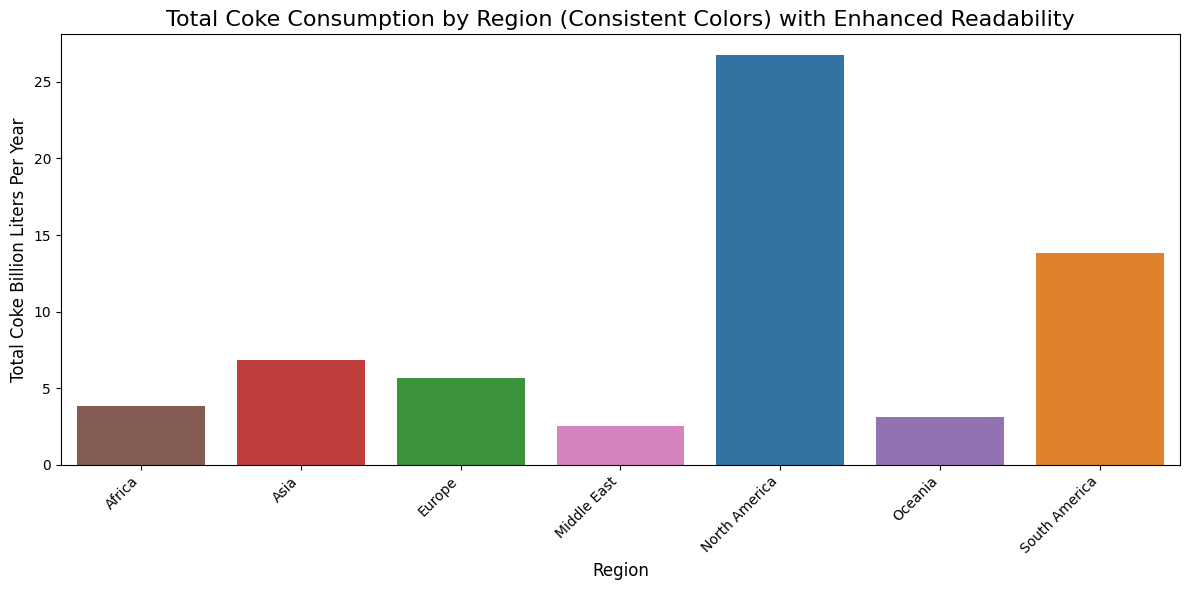

In [25]:
plt.figure(figsize=(12, 6))

# Create a list of colors based on the grouped_df index and the region_color_map
barchart_colors = [region_color_map[region] for region in grouped_df.index]

sns.barplot(
    x=grouped_df.index,
    y='Total_Coke_Billion_Liters_Per_Year',
    data=grouped_df,
    hue=grouped_df.index, # Assign the x variable to hue for consistent coloring
    palette=barchart_colors,
    legend=False # Set legend to False as the hue is redundant with x-axis labels
)
plt.title('Total Coke Consumption by Region (Consistent Colors) with Enhanced Readability', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Coke Billion Liters Per Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

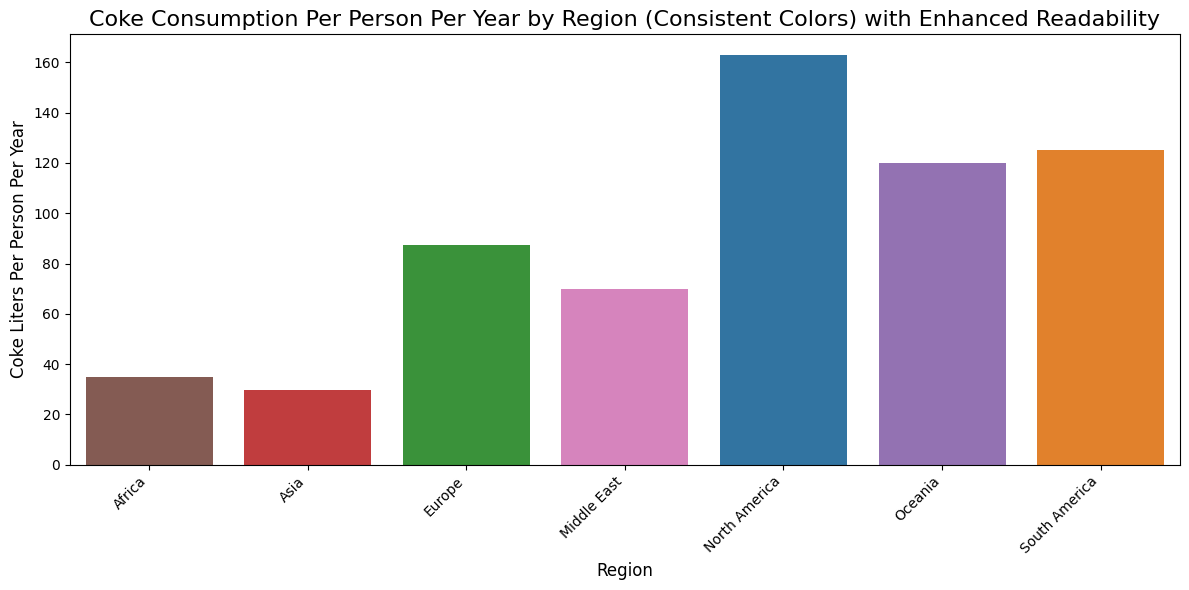

In [26]:
plt.figure(figsize=(12, 6))

# Create a list of colors based on the grouped_df index and the region_color_map
barchart_colors_per_person = [region_color_map[region] for region in grouped_df.index]

sns.barplot(
    x=grouped_df.index,
    y='Coke_Liters_Per_Person_Per_Year',
    data=grouped_df,
    hue=grouped_df.index, # Assign the x variable to hue for consistent coloring
    palette=barchart_colors_per_person,
    legend=False # Set legend to False as the hue is redundant with x-axis labels
)
plt.title('Coke Consumption Per Person Per Year by Region (Consistent Colors) with Enhanced Readability', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Coke Liters Per Person Per Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

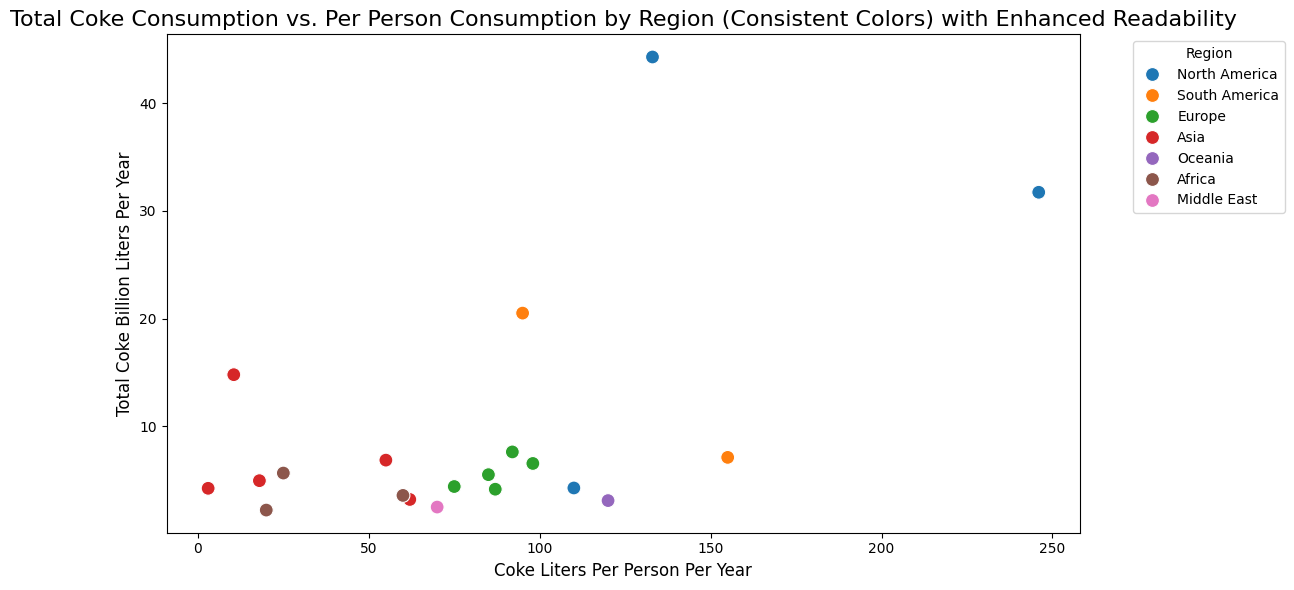

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Coke_Liters_Per_Person_Per_Year',
    y='Total_Coke_Billion_Liters_Per_Year',
    hue='Region',
    data=df,
    palette=region_color_map, # Use the consistent color map
    s=100 # Set point size for better visibility
)
plt.title('Total Coke Consumption vs. Per Person Consumption by Region (Consistent Colors) with Enhanced Readability', fontsize=16)
plt.xlabel('Coke Liters Per Person Per Year', fontsize=12)
plt.ylabel('Total Coke Billion Liters Per Year', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside for clarity
plt.tight_layout()
plt.show()

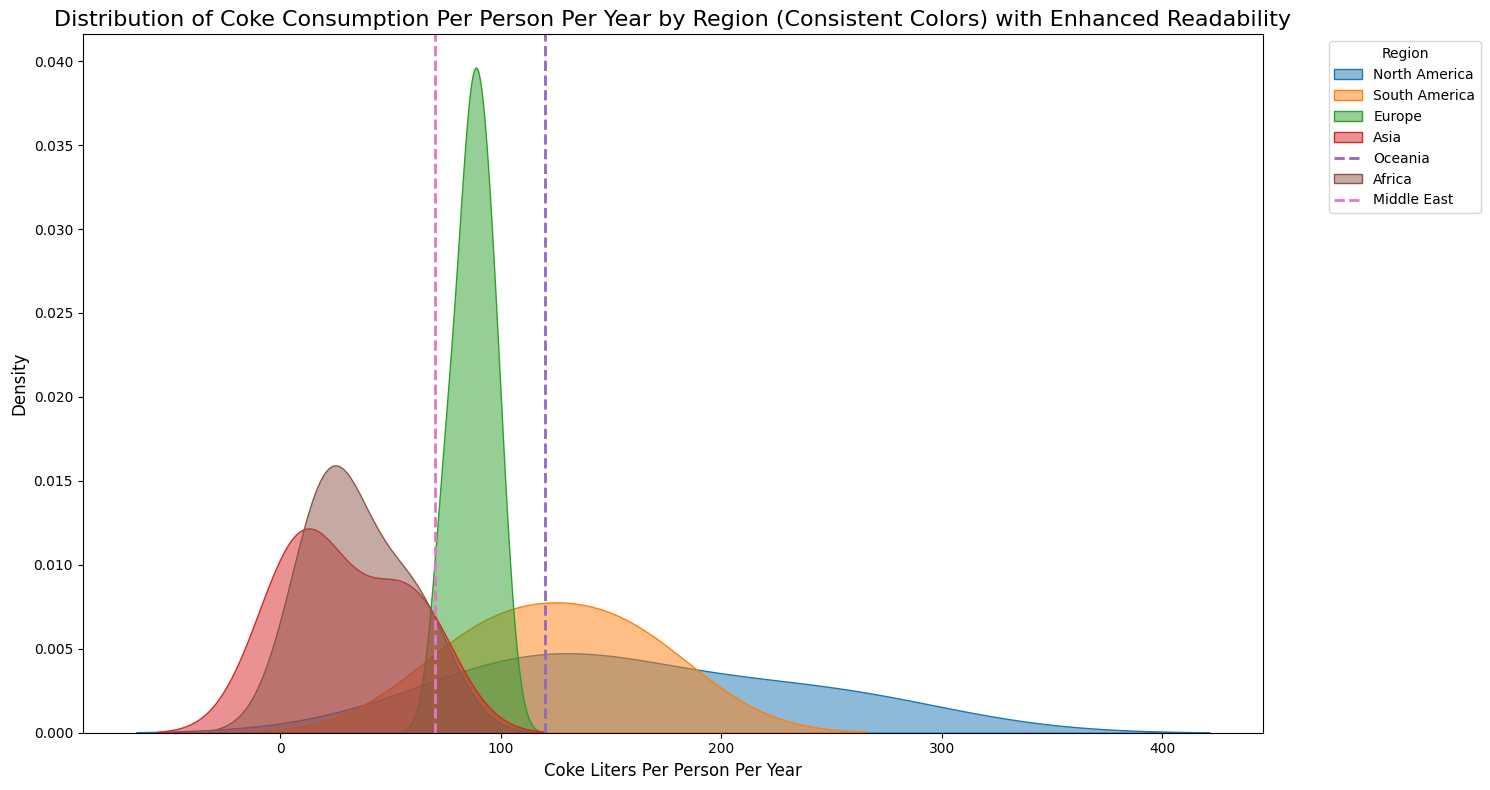

In [28]:
plt.figure(figsize=(15, 8))

for region in unique_regions:
    subset = df[df['Region'] == region]
    # Check if there is enough data for a meaningful KDE plot
    if len(subset['Coke_Liters_Per_Person_Per_Year'].unique()) > 1:
        sns.kdeplot(
            x='Coke_Liters_Per_Person_Per_Year',
            data=subset,
            label=region,
            color=region_color_map[region],
            fill=True,
            alpha=0.5
        )
    else:
        # For single data points, plot a vertical line
        single_value = subset['Coke_Liters_Per_Person_Per_Year'].iloc[0]
        plt.axvline(x=single_value,
                    color=region_color_map[region],
                    linestyle='--',
                    label=region,
                    linewidth=2)

plt.title('Distribution of Coke Consumption Per Person Per Year by Region (Consistent Colors) with Enhanced Readability', fontsize=16)
plt.xlabel('Coke Liters Per Person Per Year', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Consistent Color Palette Implemented**: A consistent color palette was successfully defined and applied across all generated graphs, mapping each unique region to a specific color, which significantly improved visual consistency and comparability across different visualizations.
*   **Enhanced Readability Across All Charts**:
    *   Font sizes for titles were increased to 16 and axis labels to 12 in all bar charts, scatter plots, and distribution plots.
    *   X-axis labels in bar charts were rotated by 45 degrees with right alignment to prevent overlap and improve clarity.
    *   Scatter plot points were enlarged (size 100) for better visibility.
    *   Legends were strategically placed outside the plot area (`bbox_to_anchor=(1.05, 1)`) for scatter and distribution plots, preventing obstruction of data points.
    *   The `plt.tight_layout()` function was consistently used to optimize spacing and ensure all plot elements were clearly visible.
*   **Robust Distribution Plotting**: For the distribution of coke consumption per person, Kernel Density Estimate (KDE) plots were generated for regions with sufficient data, while vertical lines were used to represent regions with a single unique data point, ensuring all regions were adequately represented without misinterpretation.
*   **No Errors or Warnings Encountered**: The execution of all graph generation steps concluded without any reported errors or warnings, confirming the successful implementation of all visual enhancements and data handling logic.

### Insights or Next Steps

*   The implemented visual enhancements and consistent color scheme provide a clearer and more professional presentation of the regional coke consumption data, making it easier for stakeholders to interpret trends and differences across regions.
*   Consider automating the generation of a comprehensive report that compiles these improved visualizations, perhaps with interactive elements, to further facilitate data exploration and decision-making.


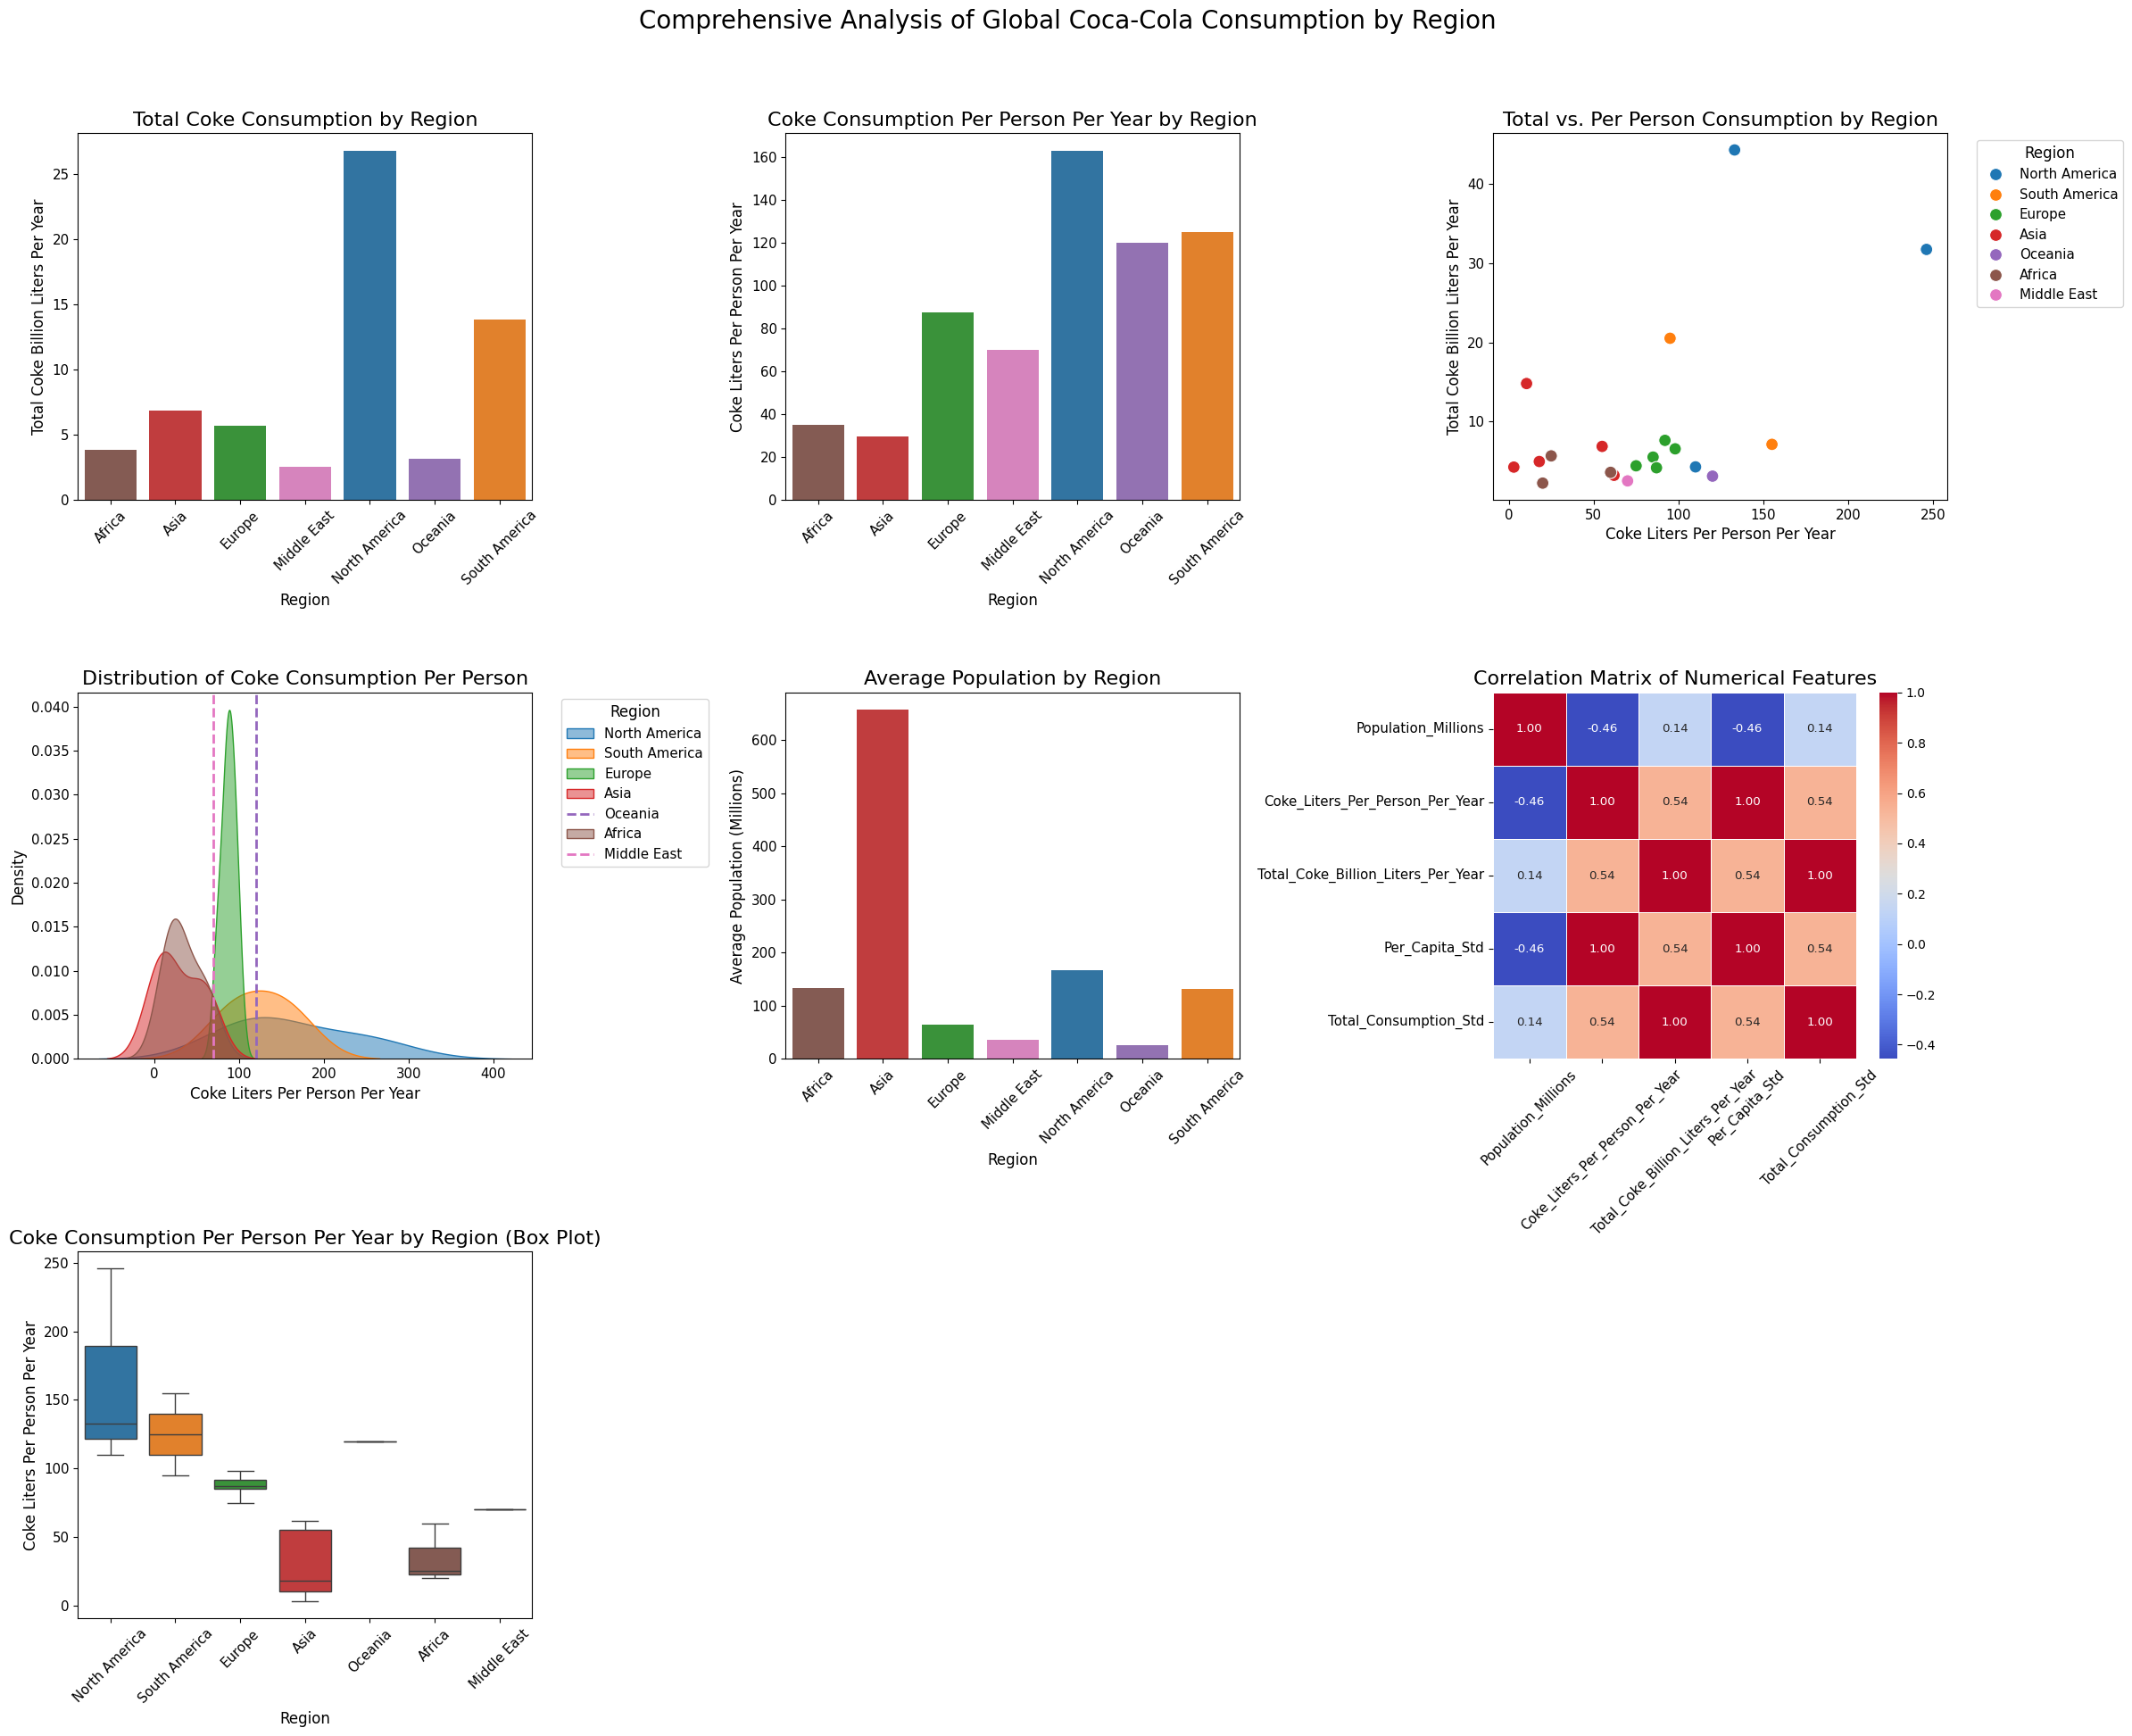

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The region_color_map and font sizes should already be defined from previous steps.
# Re-defining them here for clarity if this cell were run in isolation, but assuming they exist.
# unique_regions = df['Region'].unique() # This should also be available

# Define a consistent color palette for regions if not already defined
if 'region_color_map' not in locals():
    region_color_map = {
        'North America': '#1f77b4',  # Muted blue
        'South America': '#ff7f0e',  # Muted orange
        'Europe': '#2ca02c',       # Muted green
        'Asia': '#d62728',         # Muted red
        'Oceania': '#9467bd',      # Muted purple
        'Africa': '#8c564b',       # Muted brown
        'Middle East': '#e377c2'    # Muted pink
    }

# Set standard font sizes for titles and labels if not already defined
if 'title_fontsize' not in locals():
    title_fontsize = 16
if 'label_fontsize' not in locals():
    label_fontsize = 12

# Create a multi-subplot figure
# Using a 3x3 grid to accommodate 7 plots, leaving 2 empty for better spacing or future additions.
fig, axes = plt.subplots(3, 3, figsize=(24, 20))
axes = axes.flatten() # Flatten the 2D array of axes for easier iteration

# --- Plot 1: Total Coke Consumption by Region (Bar Chart) ---
ax0 = axes[0]
sns.barplot(
    x=grouped_df.index,
    y='Total_Coke_Billion_Liters_Per_Year',
    data=grouped_df,
    hue=grouped_df.index, # Use hue to correctly map colors from region_color_map
    palette=region_color_map,
    legend=False,
    ax=ax0
)
ax0.set_title('Total Coke Consumption by Region', fontsize=title_fontsize)
ax0.set_xlabel('Region', fontsize=label_fontsize)
ax0.set_ylabel('Total Coke Billion Liters Per Year', fontsize=label_fontsize)
ax0.tick_params(axis='x', rotation=45, labelsize=label_fontsize * 0.9)
ax0.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Plot 2: Coke Consumption Per Person Per Year by Region (Bar Chart) ---
ax1 = axes[1]
sns.barplot(
    x=grouped_df.index,
    y='Coke_Liters_Per_Person_Per_Year',
    data=grouped_df,
    hue=grouped_df.index,
    palette=region_color_map,
    legend=False,
    ax=ax1
)
ax1.set_title('Coke Consumption Per Person Per Year by Region', fontsize=title_fontsize)
ax1.set_xlabel('Region', fontsize=label_fontsize)
ax1.set_ylabel('Coke Liters Per Person Per Year', fontsize=label_fontsize)
ax1.tick_params(axis='x', rotation=45, labelsize=label_fontsize * 0.9)
ax1.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Plot 3: Total Coke Consumption vs. Per Person Consumption by Region (Scatter Plot) ---
ax2 = axes[2]
sns.scatterplot(
    x='Coke_Liters_Per_Person_Per_Year',
    y='Total_Coke_Billion_Liters_Per_Year',
    hue='Region',
    data=df,
    palette=region_color_map,
    s=100, # Set point size for better visibility
    ax=ax2
)
ax2.set_title('Total vs. Per Person Consumption by Region', fontsize=title_fontsize)
ax2.set_xlabel('Coke Liters Per Person Per Year', fontsize=label_fontsize)
ax2.set_ylabel('Total Coke Billion Liters Per Year', fontsize=label_fontsize)
ax2.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_fontsize * 0.9, title_fontsize=label_fontsize)
ax2.tick_params(axis='x', labelsize=label_fontsize * 0.9)
ax2.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Plot 4: Distribution of Coke Consumption Per Person Per Year by Region (KDE/Vertical Line) ---
ax3 = axes[3]
if 'unique_regions' not in locals(): # Ensure unique_regions is defined
    unique_regions = df['Region'].unique()
for region in unique_regions:
    subset = df[df['Region'] == region]
    if len(subset['Coke_Liters_Per_Person_Per_Year'].unique()) > 1:
        sns.kdeplot(
            x='Coke_Liters_Per_Person_Per_Year',
            data=subset,
            label=region,
            color=region_color_map[region],
            fill=True,
            alpha=0.5,
            ax=ax3
        )
    else:
        # For single data points, plot a vertical line
        single_value = subset['Coke_Liters_Per_Person_Per_Year'].iloc[0]
        ax3.axvline(x=single_value,
                   color=region_color_map[region],
                   linestyle='--',                   label=region,
                   linewidth=2)

ax3.set_title('Distribution of Coke Consumption Per Person', fontsize=title_fontsize)
ax3.set_xlabel('Coke Liters Per Person Per Year', fontsize=label_fontsize)
ax3.set_ylabel('Density', fontsize=label_fontsize)
ax3.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=label_fontsize * 0.9, title_fontsize=label_fontsize)
ax3.tick_params(axis='x', labelsize=label_fontsize * 0.9)
ax3.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Plot 5: Average Population by Region (Bar Chart) ---
ax4 = axes[4]
sns.barplot(
    x=grouped_df.index,
    y='Population_Millions',
    data=grouped_df,
    hue=grouped_df.index,
    palette=region_color_map,
    legend=False,
    ax=ax4
)
ax4.set_title('Average Population by Region', fontsize=title_fontsize)
ax4.set_xlabel('Region', fontsize=label_fontsize)
ax4.set_ylabel('Average Population (Millions)', fontsize=label_fontsize)
ax4.tick_params(axis='x', rotation=45, labelsize=label_fontsize * 0.9)
ax4.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Plot 6: Heatmap of Correlations between numerical features ---
ax5 = axes[5]
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax5, annot_kws={"size": label_fontsize * 0.8})
ax5.set_title('Correlation Matrix of Numerical Features', fontsize=title_fontsize)
ax5.tick_params(axis='x', rotation=45, labelsize=label_fontsize * 0.9)
ax5.tick_params(axis='y', rotation=0, labelsize=label_fontsize * 0.9)

# --- Plot 7: Box Plot of Coke Consumption Per Person Per Year by Region ---
ax6 = axes[6]
sns.boxplot(
    x='Region',
    y='Coke_Liters_Per_Person_Per_Year',
    data=df,
    hue='Region', # Added hue for consistent coloring and to suppress FutureWarning
    palette=region_color_map,
    legend=False, # Set legend to False as hue is for coloring, not a separate legend
    ax=ax6
)
ax6.set_title('Coke Consumption Per Person Per Year by Region (Box Plot)', fontsize=title_fontsize)
ax6.set_xlabel('Region', fontsize=label_fontsize)
ax6.set_ylabel('Coke Liters Per Person Per Year', fontsize=label_fontsize)
ax6.tick_params(axis='x', rotation=45, labelsize=label_fontsize * 0.9)
ax6.tick_params(axis='y', labelsize=label_fontsize * 0.9)

# --- Turn off unused subplots ---
for i in range(7, 9):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping titles/labels and add an overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for a suptitle
plt.suptitle('Comprehensive Analysis of Global Coca-Cola Consumption by Region', fontsize=20, y=1.0)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Integrated Visualization**: A single, comprehensive visualization was successfully generated, integrating seven distinct plots to analyze Coca-Cola consumption patterns across different regions. This included bar charts for total consumption and per-person consumption, a scatter plot comparing total and per-person consumption, a KDE/vertical line plot for per-person consumption distribution, a bar chart for average population, a correlation heatmap, and a box plot for per-person consumption.
*   **Consistent Styling**: All visualizations maintained a consistent visual aesthetic through a predefined color palette for seven regions (North America, South America, Europe, Asia, Oceania, Africa, Middle East) and standard font sizes for titles (16) and labels (12), enhancing readability and comparability across plots.
*   **Robustness in Plotting**: Minor issues during the plotting process, such as an invalid `ha='right'` parameter in `tick_params` and a `FutureWarning` in `seaborn.boxplot` regarding the `hue` argument, were identified and corrected, ensuring the smooth generation of all intended visualizations.

### Insights or Next Steps

*   The comprehensive visualization provides a strong foundation for identifying regional disparities in Coca-Cola consumption and potential correlations between consumption metrics and population. This integrated view can facilitate a deeper understanding of market dynamics.
*   Future analysis could involve investigating specific factors that drive high or low per-person consumption in certain regions, potentially through deeper dives into demographic, economic, or cultural data for those areas, or by performing statistical tests based on the correlations observed in the heatmap.
